In [28]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


ratings = pd.read_csv("~/Projects/Mimir/data/ratings.csv",sep=";",on_bad_lines="skip",encoding='latin-1')
users = pd.read_csv("~/Projects/Mimir/data/users.csv",sep=";",on_bad_lines="skip",encoding='latin-1')
books = pd.read_csv("~/Projects/Mimir/data/books.csv",sep=";",on_bad_lines="skip",encoding='latin-1', low_memory=False)

______

## Ratings

In [29]:
ratings.info()
print("\n",f'Unique users: {len(set(ratings["User-ID"]))}')
print(f'Unique books: {len(set(ratings["ISBN"]))}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

 Unique users: 105283
Unique books: 340556


__1.15 million ratings. No missing values__\
__105283 unique users, so average of 10 ratings per user__\
__340556 unique books, so average of 3 ratings per book__\
__Always by ISBN, matches book dataset__

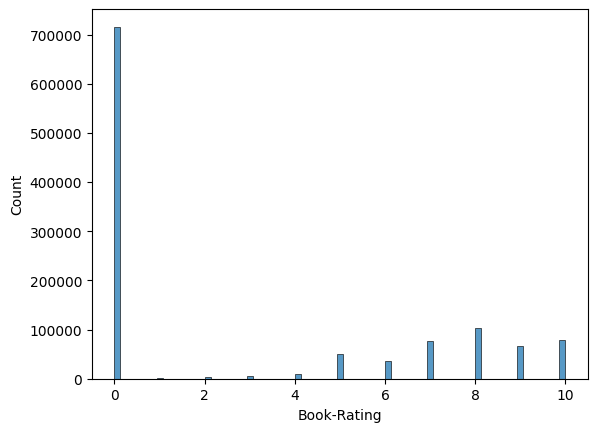

In [30]:
ratings["Book-Rating"].value_counts()
sns.histplot(ratings["Book-Rating"])
plt.show()

__Disproportionate number of 0/10 ratings - about 70%__

_____

## Users

In [31]:
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


__278858 registered users, so fewer than half have reviewed books__\
__Every location has a value (some are "n/a", see below), but ~100000 missing ages__\
__A few funny fuckers have entered ages up to 244__

In [32]:
users["Location"]

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

__Locations seem to be organised as CITY, STATE, COUNTRY__

In [33]:
users[users['Location'].str.contains("n/a")]

,User-ID,Location,Age
30,31,"shanghai, n/a, china",20.0
36,37,"san sebastian, n/a, spain",23.0
44,45,"berlin, n/a, germany",NaN
64,65,"n/a, n/a, australia",NaN
73,74,"amsterdam, n/a, netherlands",30.0
...,...,...,...
278781,278782,"larnaca, n/a, cyprus",NaN
278787,278788,"zuerich, n/a, switzerland",NaN
278807,278808,"esplugas de llobregat, n/a, spain",43.0
278852,278853,"stranraer, n/a, united kingdom",17.0


__About 13,000 have missing entries for one or more of these location parts__

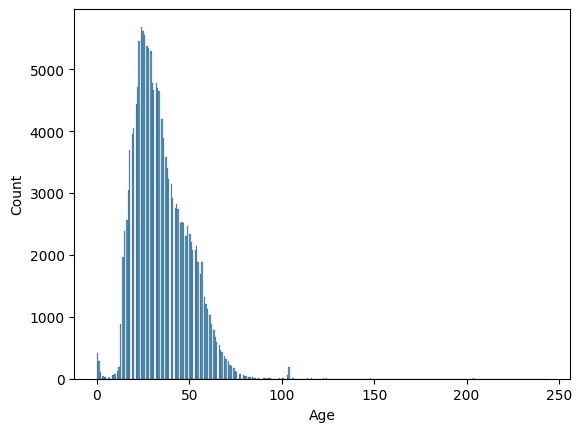

Most common age: 24.0


In [34]:
sns.histplot(users[~np.isnan(users["Age"])]["Age"])
plt.show()
print(f'Most common age: {users["Age"].value_counts().keys()[0]}')

____

## Derived attributes & Correlations

In [35]:
most_popular_book = ratings["ISBN"].value_counts().keys()[0]
most_popular_book_info = books[books["ISBN"]==most_popular_book]
print(f'Most popular book: {most_popular_book}')
print(most_popular_book_info[["ISBN","Book-Title","Book-Author","Year-Of-Publication"]],"\n")
most_frequent_reviewer = ratings["User-ID"].value_counts().keys()[0]
most_frequent_reviewer_info = users[users["User-ID"]==most_frequent_reviewer]
print(f'Most frequent reviewer: {most_frequent_reviewer}')
print(most_frequent_reviewer_info,"\n")

Most popular book: 0971880107
          ISBN   Book-Title   Book-Author Year-Of-Publication
26  0971880107  Wild Animus  Rich Shapero                2004 

Most frequent reviewer: 11676
       User-ID       Location  Age
11675    11676  n/a, n/a, n/a  NaN 



In [59]:
ratings["User-ID"].value_counts().loc[ratings["User-ID"].value_counts().keys()[0]]

np.int64(13602)

In [60]:
ratings["User-ID"].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
119573        1
276706        1
276697        1
276679        1
276676        1
Name: count, Length: 105283, dtype: int64

In [89]:
users["Number of Reviews"] = users["User-ID"].apply(lambda user: ratings["User-ID"].value_counts().loc[user] if user in ratings["User-ID"].value_counts().keys() else np.nan)

KeyboardInterrupt: 

In [ ]:
users["Number of Reviews"] = users["User-ID"].apply(lambda user: ratings["User-ID"].value_counts().loc[user] if user in ratings["User-ID"].value_counts().keys() else np.nan)